### ML Framework : scikit-learn
: 다양한 분류기를 지원하며 검증하는 기능, 분류, 회귀, 클러스터링, 차원축소법이 가능하며 샘플 데이터도 제공한다

In [3]:
# XOR 연산 학습해 보기
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0],
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [1]:
import pandas as pd

In [5]:
# 학습 전용 데이터와 테스트 전용 데이터로 분류
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2]
xor_label = xor_df.iloc[:,2]

print(xor_data) # 문제
print("-"*10)
print(xor_label) # 정답



   0  1
0  0  0
1  0  1
2  1  0
3  1  1
----------
0    0
1    1
2    1
3    0
Name: 2, dtype: int64


In [6]:
# 데이터 학습과 예측하기
from sklearn import svm, metrics

In [9]:
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pred = clf.predict(xor_data)
pred

array([0, 1, 1, 0])

In [10]:
# 정답율 구하기
metrics.accuracy_score(xor_label, pred) # (원래답 , 예측값)
# R style

1.0

In [12]:
clf = svm.SVC()
clf.fit(xor_data, xor_label)
clf.score(xor_data, xor_label) # 간단해서 이정도는 바로 이렇게 정답율 뽑아낼 수 있음 

1.0

### Iris 품종 분류하기

In [13]:
iris = pd.read_csv('../Data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [16]:
# 품종을 컬러값으로 구분하기 if
color_tmp =[]
for name in iris['Name']:
    if name == 'Iris-setosa':
        color_tmp.append('red')
    elif name == 'Iris-versicolor':
        color_tmp.append('green')
    else:
        color_tmp.append('blue')

iris['Color'] = color_tmp

In [23]:
iris.loc[iris['Name'] == "Iris-setosa", 'Color'] == 'red'
iris.loc[iris['Name'] == "Iris-versicolor", 'Color'] == 'green'
iris.loc[iris['Name'] == "Iris-virginica", 'Color'] == 'blue'
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue
149,5.9,3.0,5.1,1.8,Iris-virginica,blue


In [17]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue


In [18]:
# Scatter
import matplotlib.pyplot as plt

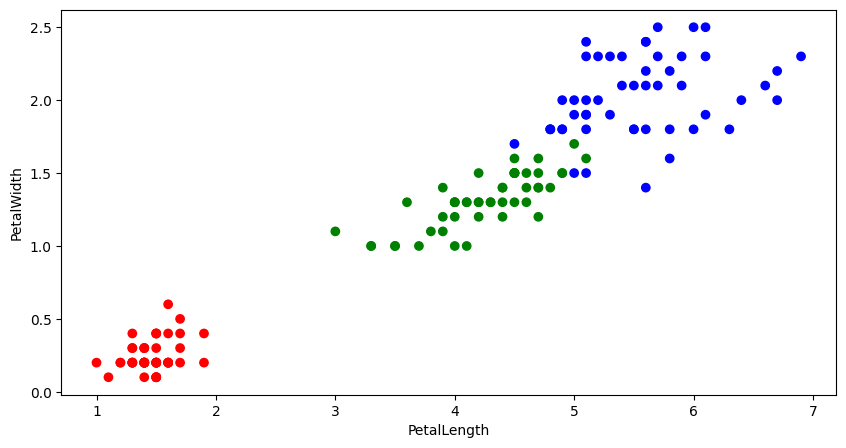

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(
    iris.PetalLength,
    iris.PetalWidth,
    c = iris.Color
)
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()

---
### ML을 위한 작업

In [24]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [25]:
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris.Name
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [26]:
# 학습용과 테스트용 나누기
from sklearn.model_selection import train_test_split
# 기본적으로 8:2로 나뉘어줌

In [27]:
train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label)

In [28]:
# SVM
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [30]:
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa']


In [31]:
# 정답율
clf.score(train_data, train_label)

0.9732142857142857

In [32]:
clf.score(test_data, test_label)

0.9736842105263158

In [33]:
print(metrics.classification_report(test_label, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



### 분류 Report 이해하기
번호 : [ 1,  2,  3,  4, 5,  6]    
정답 : [음치,음치,음치,음치,정상,정상]     
예측 : [음치,음치,정상,정상,정상,정상]     

- 음치 찾기

정확도 : 예측이 맞은 비율       
4 / 6(음치2개, 정상2개) 4/6 = 0.66     
    
정밀도 :     
음치라고 예측한 사람들 중에 진짜 음치가 얼마나 있는가?    
2 / 2 = 1.0 (음치가 2개라고 예측했는데 2개 다 맞음)       
   
정상이라고 예측한 사람들 중에 진짜 정상은 얼마나 있는가?    
2 / 4 = 0.5 (정상이 4개라고 예측했는데 정상은 2개밖에 없음)   
    
재현율 :     
전체 음치 중에서 내가 맞춘 음치의 비율   
원래 음치가 4명 있는데 그 중에서 2명을 맞춤 2/4 = 0.5      

전체 정상 중에서 내가 맞춘 정상의 비율
원래 정상은 2명 있고 그 중에서 4명을 맞춤 4/2 = 2.0 ...??! (과소적합)    

F1 Score : 정밀도와 재현율의 평균   
(2 * 정밀도 * 재현율) / (정밀도 + 재현율) = 0.6

In [34]:
import numpy as np

In [51]:
# 찾고자 하는걸 True로 주는게 좋다, 음치=1, 정상=0
y = np.array([1,1,1,1,0,0]) # 정답
p = np.array([1,1,0,0,0,0]) # 예측

# 정확도
print('정확도 :' , np.mean(np.equal(y, p))) # 2진분류

# 정밀도
right = np.sum(y * p == 1)
precision = right / np.sum(p)
print('정밀도 :', precision)

# 재현율
recall = right / np.sum(y)
print('재현율 :',recall)

# F1 Score
f1 = 2 *precision * recall / (precision + recall)
print('f1 :',f1)




정확도 : 0.6666666666666666
정밀도 : 1.0
재현율 : 0.5
f1 : 0.6666666666666666


In [55]:
print('accuracy :', metrics.accuracy_score(y,p))
print('precision :',metrics.precision_score(y,p))
print('recall : ', metrics.recall_score(y,p))
print('f1 : ', metrics.f1_score(y,p))

# accuracy 와 c1이 비슷하게 나와야 댐 

accuracy : 0.6666666666666666
precision : 1.0
recall :  0.5
f1 :  0.6666666666666666
